In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_excel('/Users/akshadadhadgegadgil/Documents/ML_Kaggle/plant_disease_predictor/plant.xlsx')

In [45]:
df.head()

,temperature,humidity,rainfall,soil_pH,disease_present
0,27.483571,33.215053,0.572758,4.975875,1
1,24.308678,36.945005,42.522346,8.165266,0
2,28.238443,34.026189,16.095303,6.316734,1
3,32.615149,41.104180,20.311015,6.164949,0
4,23.829233,51.971785,11.851323,8.482468,0


In [46]:
df.describe()

,temperature,humidity,rainfall,soil_pH,disease_present
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,25.612191,62.119300,9.807522,6.245855,0.241000
std,5.813841,22.679977,9.852130,1.302465,0.427712
min,5.387999,6.244209,0.000055,4.000075,0.000000
25%,21.815610,40.772925,2.812822,5.122970,0.000000
50%,25.293238,72.211752,6.864898,6.232188,0.000000
75%,28.916048,81.032999,13.442871,7.386377,0.000000
max,56.686495,102.395421,84.654161,8.499875,1.000000


In [47]:
print(df.shape)

(10000, 5)


In [48]:
#Data cleaning and preprocessing

def cleaning(df):
    print('Missing values', df.isnull().sum())

    print("\nData types:\n", df.dtypes)

    df = df.dropna()

    #df = df.drop_duplicates()
    return df

In [49]:
cleaning(df)

Missing values temperature        0
humidity           0
rainfall           0
soil_pH            0
disease_present    0
dtype: int64

Data types:
 temperature        float64
humidity           float64
rainfall           float64
soil_pH            float64
disease_present      int64
dtype: object


,temperature,humidity,rainfall,soil_pH,disease_present
0,27.483571,33.215053,0.572758,4.975875,1
1,24.308678,36.945005,42.522346,8.165266,0
2,28.238443,34.026189,16.095303,6.316734,1
3,32.615149,41.104180,20.311015,6.164949,0
4,23.829233,51.971785,11.851323,8.482468,0
...,...,...,...,...,...
9995,31.505510,81.939137,22.406822,5.862952,1
9996,15.008275,86.886833,10.503881,4.070539,0
9997,21.473416,81.891770,13.426869,7.101583,0
9998,27.478828,88.567649,9.719659,7.732620,0


#since there are no categorical values, no need to convert using encoding

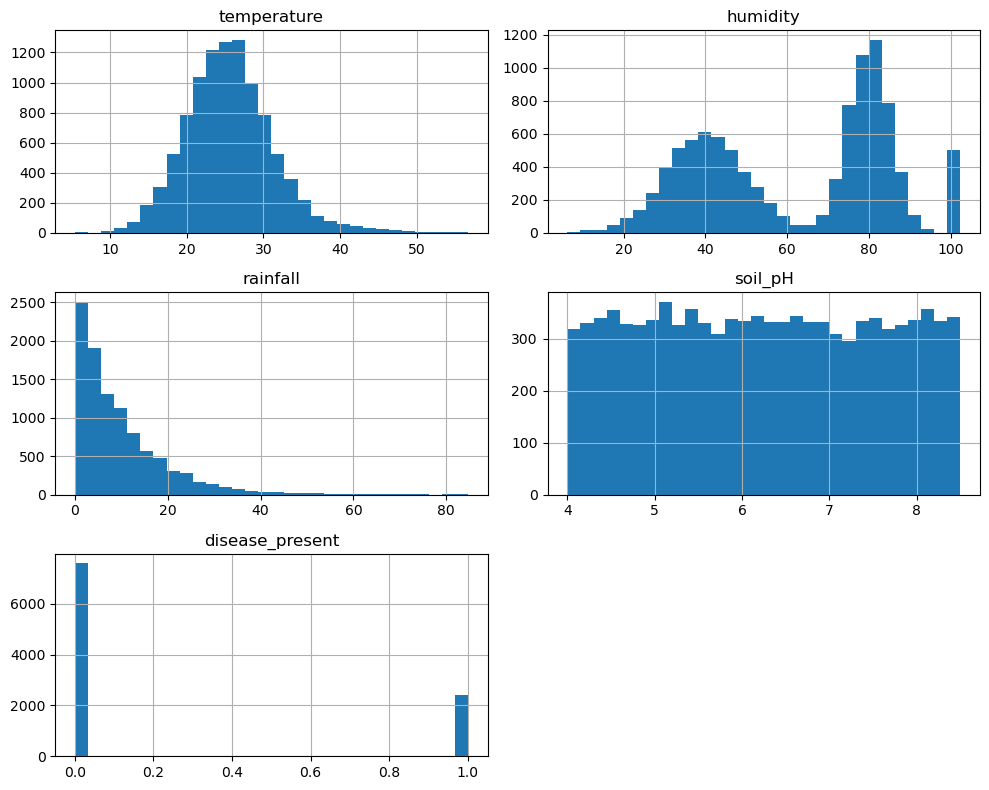

In [50]:
#EDA
#checking distribution for each feature

df.hist(bins=30,figsize=(10,8))
plt.tight_layout()
plt.show()


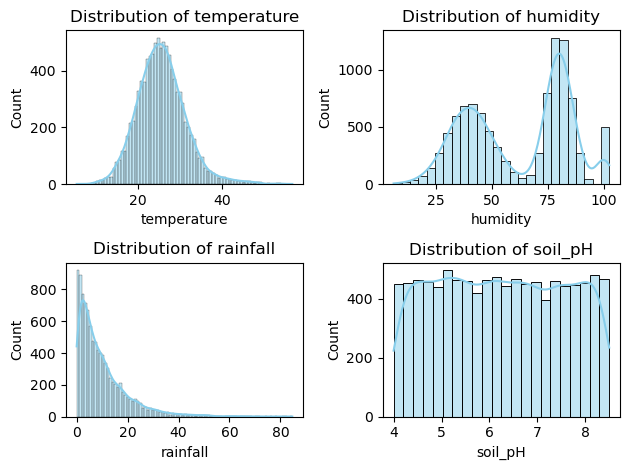

In [51]:
#histograms for numeric fetaures
num_cols = ['temperature', 'humidity', 'rainfall', 'soil_pH']
for i, col in enumerate(num_cols,1):
    plt.subplot(2,2,i)
    sns.histplot(df[col],kde=True,color='skyblue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


/Users/akshadadhadgegadgil/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


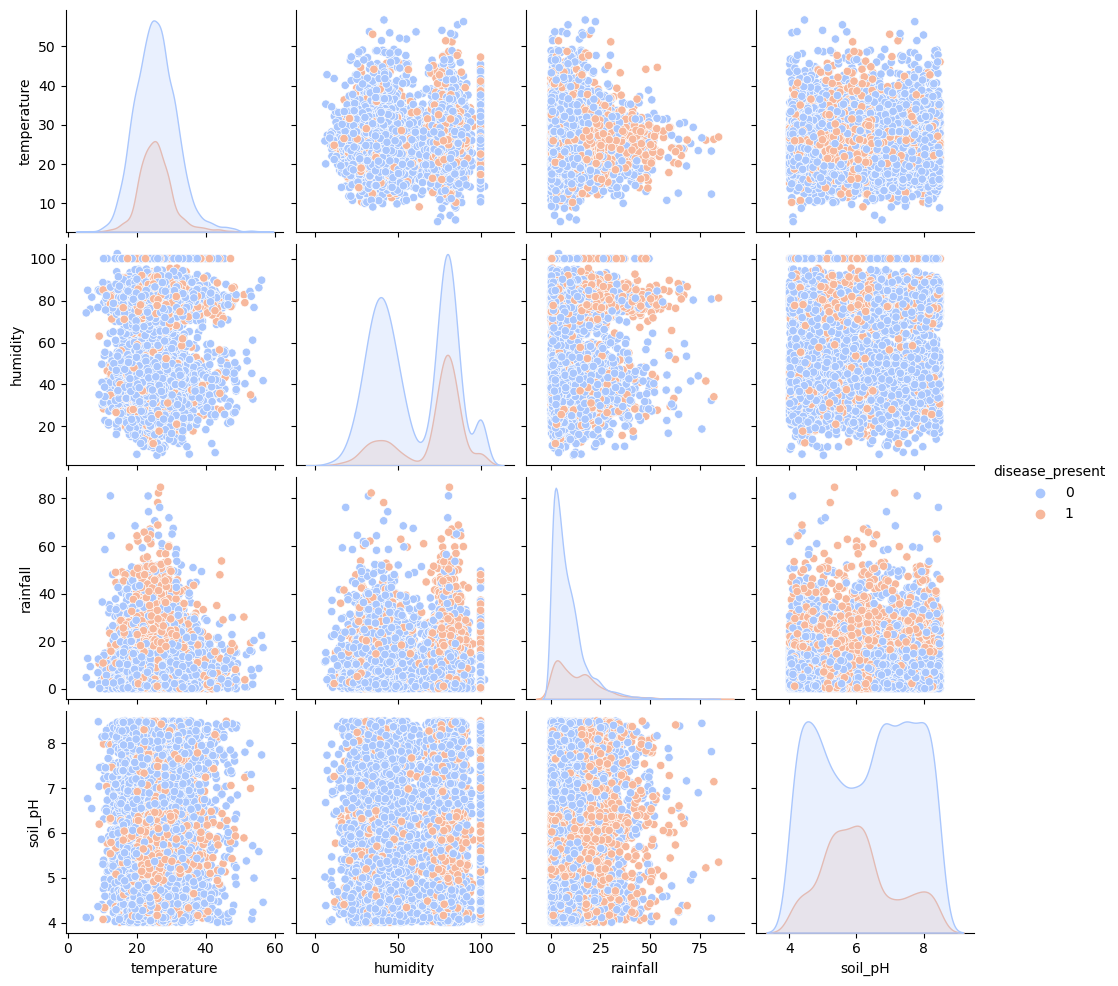

In [52]:
#pair plot

sns.pairplot(df[num_cols+['disease_present']],
             hue='disease_present',palette='coolwarm')
plt.show()

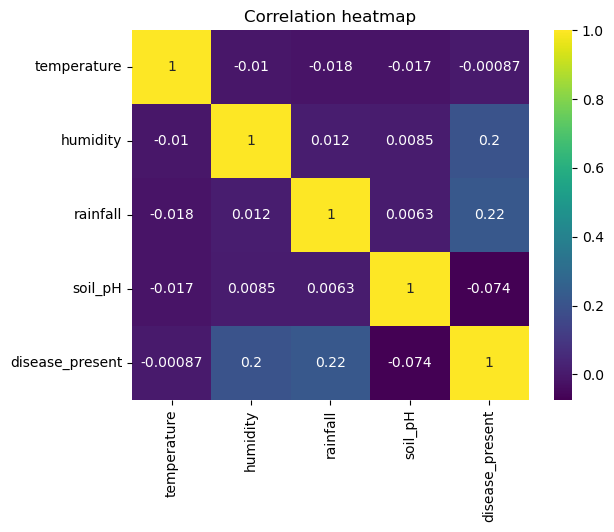

In [53]:
#corelation heatmap - use only numeric

numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
sns.heatmap(corr,annot=True,cmap='viridis')
plt.title('Correlation heatmap')
plt.show()


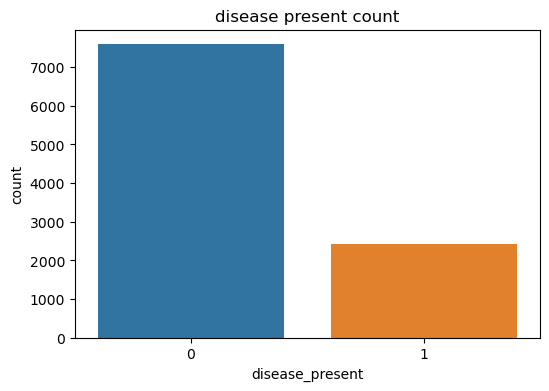

In [54]:
#count plot for disease present column

plt.figure(figsize=(6,4))
sns.countplot(x='disease_present',data=df)
plt.title('disease present count')
plt.show()


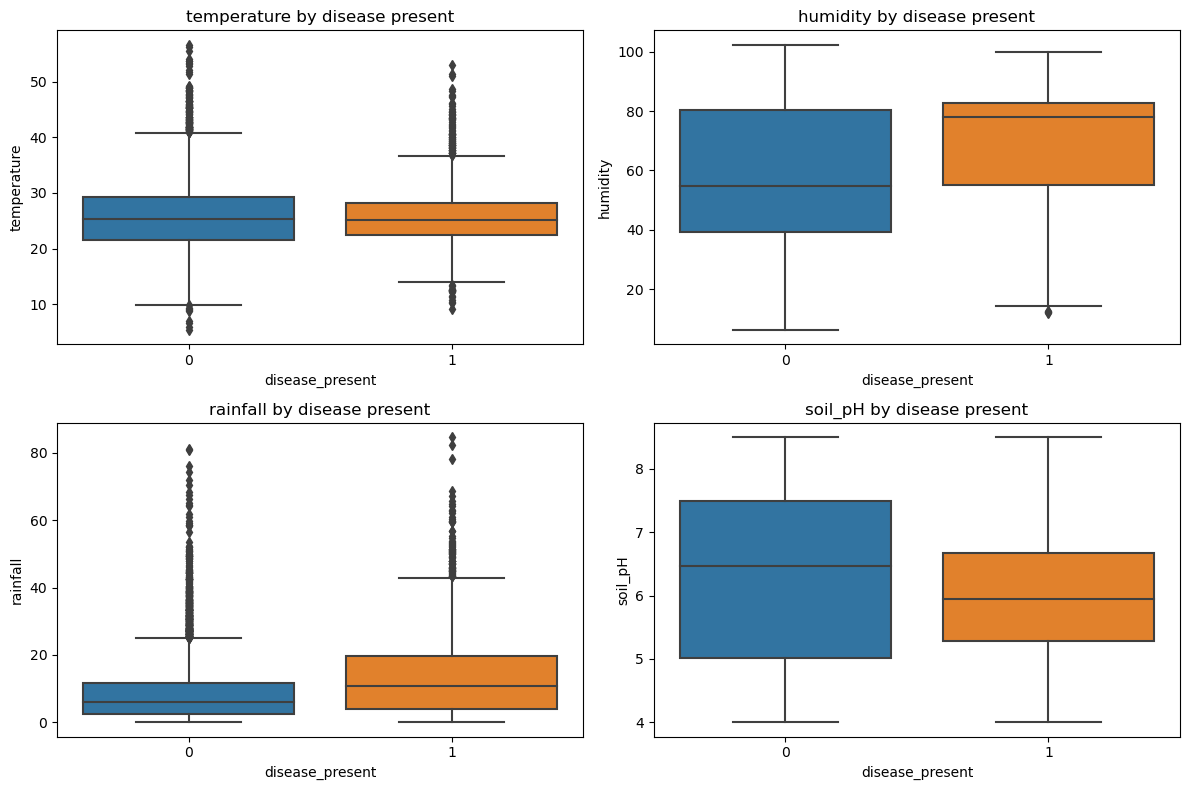

In [55]:
#box plot by numeric features bu disease present
plt.figure(figsize=(12,8))
for i ,col in enumerate(num_cols,1):
    plt.subplot(2,2,i)
    sns.boxplot(x='disease_present',y=col,data=df)
    plt.title(f'{col} by disease present')
plt.tight_layout()
plt.show()

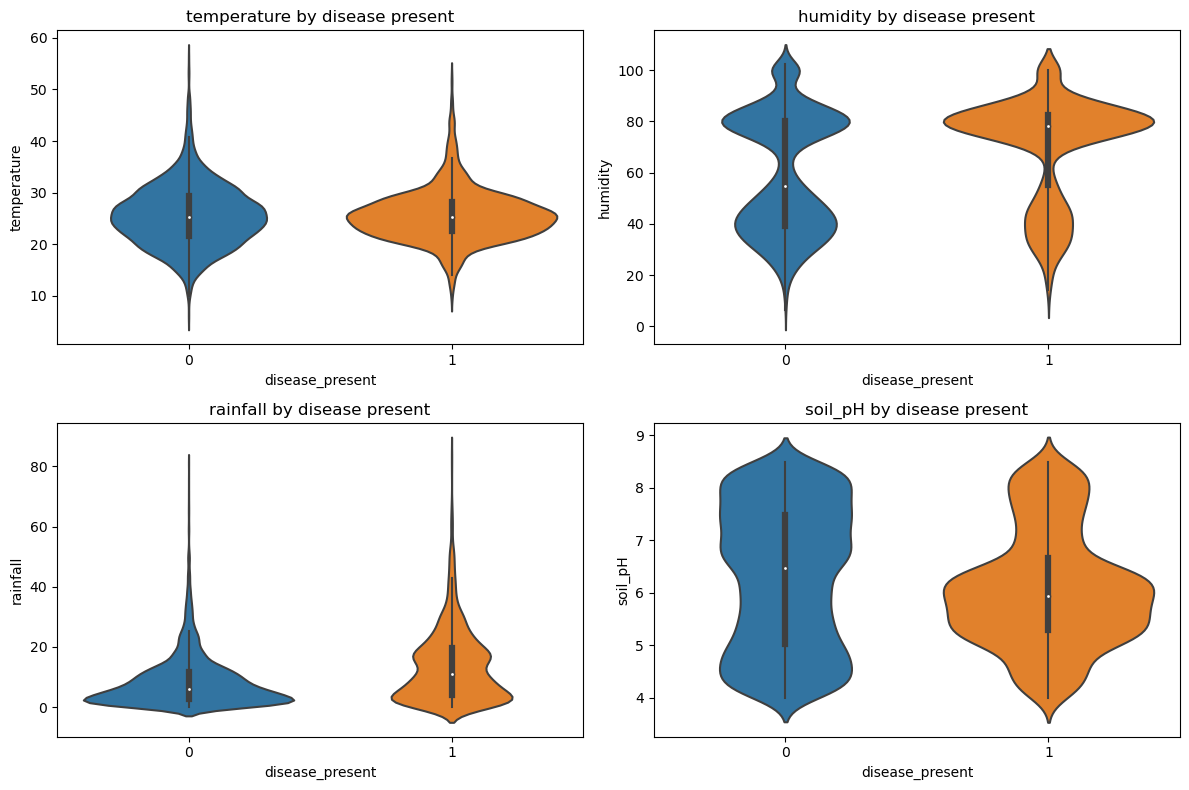

In [56]:
##violin plot by numeric features bu disease present

plt.figure(figsize=(12,8))
for i,col in enumerate(num_cols,1):
    plt.subplot(2,2,i)
    sns.violinplot(x='disease_present',y=col,data=df)
    plt.title(f'{col} by disease present')
plt.tight_layout()
plt.show()


Accuracy Score :  0.76


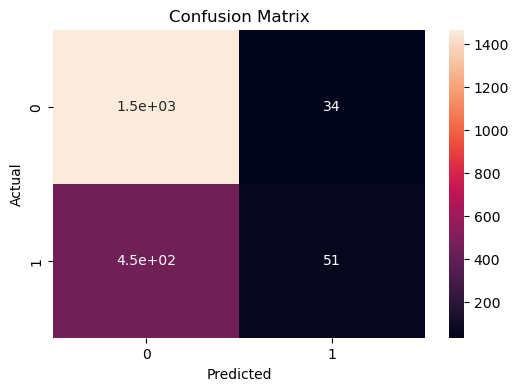

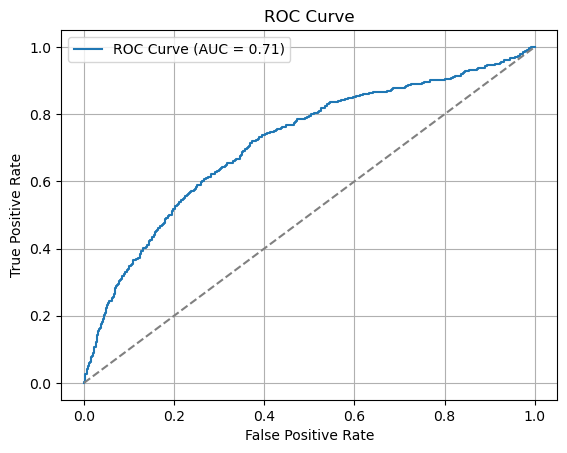

In [57]:
#predictive modeling

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,roc_curve,auc
import joblib


#define features X and target yield
X = df.drop('disease_present',axis=1)
y = df['disease_present']

#standardize the features for better performance

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#split training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=101)

#Initializing and training logistic regression model
lrm = LogisticRegression()
lrm.fit(X_train,y_train)

#predict on test data
y_pred = lrm.predict(X_test)

#evaluate model performance
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy Score : {accuracy: .2f}')

# Save model and scaler

joblib.dump(lrm, '/Users/akshadadhadgegadgil/Documents/ML_KAGGLE/plant_disease_predictor/model/model.pkl')

joblib.dump(scaler, '/Users/akshadadhadgegadgil/Documents/ML_KAGGLE/plant_disease_predictor/model/scaler.pkl')

#confusion matrix
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#ROC curve
y_prob = lrm.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,label =f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1], linestyle= '--',color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [58]:
import joblib
joblib.dump(lrm, 'model/model.pkl')

['model/model.pkl']